# Redes Neuronales

## Columns:

**Customer ID:** Whether the customer is a male or a female

**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

**checkPartner:** Whether the customer has a partner or not (Yes, No)

**checkDependents:** Whether the customer has dependents or not (Yes, No)

**tenure:** Number of months the customer has stayed with the company

**checkPhoneService:** Whether the customer has a phone service or not (Yes, No)

**text_formatMultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

**text_formatInternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

**text_formatOnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

**text_formatOnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

**text_formatDeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

**text_formatTechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)

**text_formatStreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

**text_formatStreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

**text_formatContract:** The contract term of the customer (Month-to-month, One year, Two year)

**checkPaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

**text_formatPaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged to the customer

**checkChurn:** Whether the customer churned or not (Yes or No)


## 1. **Imports:** 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. **Cargar dataset:** 


In [2]:
X_train = pd.read_csv('DF_Cols.csv')
X_train.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train = pd.read_csv('DF_Target.csv')
y_train = y_train.Churn_Yes

X_test = pd.read_csv('DF_Cols_Test.csv')
X_test.drop(['Unnamed: 0'], inplace=True, axis=1)
y_test = pd.read_csv('DF_Target_Test.csv')
y_test = y_test.Churn_Yes

In [3]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print('··················')
print('Values target train:')
print(y_train.value_counts(normalize=True))
print('··················')
print('Values target test:')
print(y_test.value_counts(normalize=True))

X_train (5282, 30)
y_train (5282,)
X_test (1761, 30)
y_test (1761,)
··················
Values target train:
0    0.73457
1    0.26543
Name: Churn_Yes, dtype: float64
··················
Values target test:
0    0.73481
1    0.26519
Name: Churn_Yes, dtype: float64


In [4]:
# Creo una instancia nueva de X_train sin modificar
X_orig = X_train.copy()

# Escalo los datos de train y test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Construimos un modelo de ejemplo

## 3. Exploracion de modelos

vamos a definir una función que nos permita instanciar un modelo secuencial a partir de los parámetros que recibe y configurar la **arquitectura** (cantidad de capas, cantidad de neuronas por capa, valor de drop out), el tamaño de los datos de entrada y el **optimizador**.

In [5]:
input_inicial = X_train.shape[1]
input_inicial

30

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((5282, 2), (1761, 2))

In [8]:
def build_model(input_shape=(X_train.shape[1],), layers=[64,64,2], optimizer='rmsprop', dropout_rate=0.25):
    # Instanciamos la clase del modelo secuencial
    model = Sequential()
    # Aplanamos los datos de entrada, sabemos que vamos a recibir imágenes
    model.add(Dense(layers[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    # Agregamos el resto de las capas con activación ReLU con excepción de la última
    for l in layers[1:-1]:
        model.add(Dense(units=l, activation='relu'))
        model.add(Dropout(dropout_rate))
    # Agregamos la última capa con activación softmax
    model.add(Dense(units=layers[-1], activation='softmax'))
    # Compilamos el modelo con el optimizador seleccionado
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Retornamos el modelo compilado
    return model

Construimos un modelo de ejemplo

In [9]:
model = build_model(layers=[32, 32, 2])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,114
Trainable params: 2,114
Non-trainable params: 0
_________________________________________________________________


In [103]:
from keras import optimizers

# Definimos la "grilla" de parámetros que vamos a explorar
layers = [[32, 32, 2],
          [64, 2],
          [128, 2]
         ]

batch_sizes = [256]

optimizers = [optimizers.Adam(), optimizers.SGD(momentum=0.9, nesterov=True), optimizers.RMSprop()]

dropout_rates = [0, 0.1, 0.25, 0.5]

Ahora debemos generar las combinaciones entre las posibilidades de ambos parámetros.

In [104]:
import itertools

combinaciones = list(itertools.product(layers, optimizers, dropout_rates, batch_sizes))
len(combinaciones)

36

In [105]:
combinaciones

[([32, 32, 2], <keras.optimizers.Adam at 0x1661f67c848>, 0, 256),
 ([32, 32, 2], <keras.optimizers.Adam at 0x1661f67c848>, 0.1, 256),
 ([32, 32, 2], <keras.optimizers.Adam at 0x1661f67c848>, 0.25, 256),
 ([32, 32, 2], <keras.optimizers.Adam at 0x1661f67c848>, 0.5, 256),
 ([32, 32, 2], <keras.optimizers.SGD at 0x1661f70ea48>, 0, 256),
 ([32, 32, 2], <keras.optimizers.SGD at 0x1661f70ea48>, 0.1, 256),
 ([32, 32, 2], <keras.optimizers.SGD at 0x1661f70ea48>, 0.25, 256),
 ([32, 32, 2], <keras.optimizers.SGD at 0x1661f70ea48>, 0.5, 256),
 ([32, 32, 2], <keras.optimizers.RMSprop at 0x1661f72bf48>, 0, 256),
 ([32, 32, 2], <keras.optimizers.RMSprop at 0x1661f72bf48>, 0.1, 256),
 ([32, 32, 2], <keras.optimizers.RMSprop at 0x1661f72bf48>, 0.25, 256),
 ([32, 32, 2], <keras.optimizers.RMSprop at 0x1661f72bf48>, 0.5, 256),
 ([64, 2], <keras.optimizers.Adam at 0x1661f67c848>, 0, 256),
 ([64, 2], <keras.optimizers.Adam at 0x1661f67c848>, 0.1, 256),
 ([64, 2], <keras.optimizers.Adam at 0x1661f67c848>, 

In [106]:
# Definamos variables estáticas
n_splits = 3
epochs = 300
verbose = 0

In [107]:
# Instanciamos los objetos early_stopping y reduce_lr y definimos una lista de callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=0)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, restore_best_weights=True, verbose=0)
callbacks_list = [reduce_lr, early_stopping]

callbacks_list_param = callbacks_list

In [108]:
# Creamos una lista vacía para ir guardando los entrenamientos
global_history = []

In [109]:
# Importamos KFold para hacer cross-validation
from sklearn.model_selection import KFold
import time

# Instanciamos el objeto KFold
kfold = KFold(n_splits=n_splits, shuffle=False)

# Recorremos las combinaciones y generamos distintos modelos a ensayar
for (layers, optimizer, dropout_rate, batch_size) in combinaciones:
    print('\n\nEnsayando modelo con estructura {}, optimizador {} y dropout rate {}'.format(layers, optimizer, dropout_rate))
    
    # Construimos el modelo
    model = build_model(layers=layers, optimizer=optimizer, dropout_rate=dropout_rate)
    
    # Guardamos los pesos iniciales para usarlos en cada fold
    model.save_weights('initial_weights.h5')
    
    # Generamos los sets de train y val para ensayar el modelo
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
        
        # Reiniciamos los pesos del modelo
        model.load_weights('initial_weights.h5')
        
        # Lo entrenamos con el split de X_train e y_train correspondiente
        print(train_idx)
        tic=time.time()
        history = model.fit(x=X_train[train_idx],
                            y=y_train[train_idx],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_train[val_idx], y_train[val_idx]),
                            verbose=verbose,
                            callbacks=callbacks_list_param,
                           )
        toc=time.time()
             
        n_epochs = len(history.history['loss'])
        
        flod_timecost = round(toc-tic, 2)
        # Evaluamos en train y en val (estos mismos valores los podemos sacar de history)
        train_loss, train_acc = model.evaluate(X_train[train_idx], y_train[train_idx])
        val_loss, val_acc = model.evaluate(X_train[val_idx], y_train[val_idx])
        
        yprednn=model.predict(X_test)
        yprednn=yprednn.round()
 

        #print('accuracy: ', yprednn)
        acc_pred = accuracy_score(np.argmax(y_test, axis=1), np.argmax(yprednn, axis=1))
        print('accuracy: ', acc_pred)
        
        # Agregamos esta corrida a la historia global
        global_history.append({'fold':fold, 
                               'layers':','.join([str(elem) for elem in layers]), 
                               'optimizer':str(type(optimizer)),
                               'dropout':dropout_rate,
                               'batch_size': batch_size,
                               'stoped_at_epoch': n_epochs,
                               'train_loss':train_loss,
                               'train_acc':train_acc,
                               'val_loss':val_loss,
                               'val_acc':val_acc,
                               'acc_pred':acc_pred,
                               'time': flod_timecost,
                               'history':history, 
                               'predict': yprednn
                              })



Ensayando modelo con estructura [32, 32, 2], optimizador <keras.optimizers.Adam object at 0x000001661F67C848> y dropout rate 0
[1761 1762 1763 ... 5279 5280 5281]
1761/1761 [==============================] - 0s 19us/step
accuracy:  0.7859170925610448
[   0    1    2 ... 5279 5280 5281]
1761/1761 [==============================] - 0s 22us/step
accuracy:  0.7796706416808632
[   0    1    2 ... 3519 3520 3521]
1760/1760 [==============================] - 0s 19us/step
accuracy:  0.7773992049971608


Ensayando modelo con estructura [32, 32, 2], optimizador <keras.optimizers.Adam object at 0x000001661F67C848> y dropout rate 0.1
[1761 1762 1763 ... 5279 5280 5281]
1761/1761 [==============================] - 0s 20us/step
accuracy:  0.7779670641680864
[   0    1    2 ... 5279 5280 5281]
1761/1761 [==============================] - 0s 20us/step
accuracy:  0.7808063600227144
[   0    1    2 ... 3519 3520 3521]
1760/1760 [==============================] - 0s 34us/step
accuracy:  0.7830777967064

In [110]:
import pandas as pd
df_history = pd.DataFrame(global_history)
df_history.sort_values(by='val_loss', ascending=True,inplace=True)

In [111]:
df_history.head(10)

,fold,layers,optimizer,dropout,batch_size,stoped_at_epoch,train_loss,train_acc,val_loss,val_acc,acc_pred,time,history,predict
0,0,"32,32,2",<class 'keras.optimizers.Adam'>,0.00,256,19,0.407172,0.807441,0.421311,0.805792,0.785917,1.28,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
75,0,"128,2",<class 'keras.optimizers.Adam'>,0.10,256,300,0.423586,0.796365,0.422230,0.809767,0.782510,13.29,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
96,0,"128,2",<class 'keras.optimizers.RMSprop'>,0.00,256,300,0.427701,0.797217,0.423438,0.813742,0.797842,9.64,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
12,0,"32,32,2",<class 'keras.optimizers.SGD'>,0.00,256,20,0.414693,0.802613,0.424286,0.808064,0.790460,1.09,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
99,0,"128,2",<class 'keras.optimizers.RMSprop'>,0.10,256,300,0.424164,0.794093,0.425792,0.805224,0.785349,21.34,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
24,0,"32,32,2",<class 'keras.optimizers.RMSprop'>,0.00,256,16,0.408177,0.806873,0.426708,0.802953,0.786485,1.04,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
102,0,"128,2",<class 'keras.optimizers.RMSprop'>,0.25,256,300,0.431711,0.802329,0.428115,0.810903,0.796139,15.97,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
105,0,"128,2",<class 'keras.optimizers.RMSprop'>,0.50,256,300,0.430745,0.795229,0.429373,0.804656,0.797274,14.30,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
72,0,"128,2",<class 'keras.optimizers.Adam'>,0.00,256,300,0.428388,0.797785,0.430013,0.797842,0.787621,10.23,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."
42,0,"64,2",<class 'keras.optimizers.Adam'>,0.25,256,300,0.439105,0.785004,0.431162,0.805792,0.789324,9.87,<keras.callbacks.callbacks.History object at 0...,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0..."


In [112]:
df_history.groupby(['layers','optimizer', 'dropout', 'batch_size']).mean().sort_values(by='val_loss', ascending=True).drop(['fold'],axis=1)

stoped_at_epoch  \
layers  optimizer                          dropout batch_size                    
128,2   <class 'keras.optimizers.RMSprop'> 0.10    256              300.000000   
                                           0.00    256              300.000000   
                                           0.25    256              300.000000   
                                           0.50    256              300.000000   
        <class 'keras.optimizers.Adam'>    0.00    256              300.000000   
32,32,2 <class 'keras.optimizers.SGD'>     0.00    256              206.666667   
64,2    <class 'keras.optimizers.RMSprop'> 0.10    256              300.000000   
        <class 'keras.optimizers.Adam'>    0.25    256              300.000000   
32,32,2 <class 'keras.optimizers.Adam'>    0.00    256              206.333333   
        <class 'keras.optimizers.RMSprop'> 0.10    256              300.000000   
64,2    <class 'keras.optimizers.Adam'>    0.50    256              300.000000   
                                           0.10    256              300.000000   
        <class 'keras.optimizers.RMSprop'> 0.00    256              300.000000   
                                           0.25    256              300.000000   
32,32,2 <class 'keras.optimizers.SGD'>     0.25    256              300.000000   
64,2    <class 'keras.optimizers.Adam'>    0.00    256              300.000000   
32,32,2 <class 'keras.optimizers.RMSprop'> 0.00    256              205.333333   
        <class 'keras.optimizers.SGD'>     0.10    256              300.000000   
        <class 'keras.optimizers.Adam'>    0.10    256              300.000000   
                                           0.25    256              300.000000   
        <class 'keras.optimizers.RMSprop'> 0.50    256              300.000000   
64,2    <class 'keras.optimizers.RMSprop'> 0.50    256              300.000000   
32,32,2 <class 'keras.optimizers.RMSprop'> 0.25    256              300.000000   
        <class 'keras.optimizers.Adam'>    0.50    256              300.000000   
128,2   <class 'keras.optimizers.Adam'>    0.10    256              300.000000   
                                           0.50    256              300.000000   
32,32,2 <class 'keras.optimizers.SGD'>     0.50    256              103.000000   
128,2   <class 'keras.optimizers.SGD'>     0.00    256                5.000000   
                                           0.50    256                5.000000   
64,2    <class 'keras.optimizers.SGD'>     0.10    256                5.000000   
                                           0.50    256                5.000000   
128,2   <class 'keras.optimizers.SGD'>     0.25    256                5.000000   
64,2    <class 'keras.optimizers.SGD'>     0.00    256                5.000000   
128,2   <class 'keras.optimizers.SGD'>     0.10    256                5.000000   
        <class 'keras.optimizers.Adam'>    0.25    256              300.000000   
64,2    <class 'keras.optimizers.SGD'>     0.25    256                5.000000   

                                                               train_loss  \
layers  optimizer                          dropout batch_size               
128,2   <class 'keras.optimizers.RMSprop'> 0.10    256           0.421605   
                                           0.00    256           0.423394   
                                           0.25    256           0.427634   
                                           0.50    256           0.427465   
        <class 'keras.optimizers.Adam'>    0.00    256           0.427319   
32,32,2 <class 'keras.optimizers.SGD'>     0.00    256           0.431724   
64,2    <class 'keras.optimizers.RMSprop'> 0.10    256           0.433156   
        <class 'keras.optimizers.Adam'>    0.25    256           0.436576   
32,32,2 <class 'keras.optimizers.Adam'>    0.00    256           0.435378   
        <class 'keras.optimizers.RMSprop'> 0.10    256           0.439882   
64,2    <class 'keras.

In [20]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['accuracy']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

In [ ]:
for history in global_history:
    plot_history(history['layers'], history['history'], legend=['train', 'val'])

# Nos quedamos con las redes [128, 2] con Adam y 0.5 de Drop Out

In [113]:
from keras import optimizers
# Instanciamos la clase del modelo secuencial
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))

# Agregamos la última capa con activación softmax
model.add(Dense(units=2, activation='softmax'))
# Compilamos el modelo con el optimizador seleccionado

optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    batch_size=256, epochs=300,
             callbacks=callbacks_list_param)



Train on 3697 samples, validate on 1585 samples
Epoch 1/300
3697/3697 [==============================] - 0s 47us/step - loss: 0.6215 - accuracy: 0.6557 - val_loss: 0.4743 - val_accuracy: 0.7621
Epoch 2/300
3697/3697 [==============================] - 0s 14us/step - loss: 0.4975 - accuracy: 0.7598 - val_loss: 0.4490 - val_accuracy: 0.7817
Epoch 3/300
3697/3697 [==============================] - 0s 16us/step - loss: 0.4818 - accuracy: 0.7712 - val_loss: 0.4402 - val_accuracy: 0.7899
Epoch 4/300
3697/3697 [==============================] - 0s 16us/step - loss: 0.4659 - accuracy: 0.7806 - val_loss: 0.4316 - val_accuracy: 0.7937
Epoch 5/300
3697/3697 [==============================] - 0s 16us/step - loss: 0.4612 - accuracy: 0.7847 - val_loss: 0.4300 - val_accuracy: 0.7899
Epoch 6/300
3697/3697 [==============================] - 0s 15us/step - loss: 0.4458 - accuracy: 0.7858 - val_loss: 0.4266 - val_accuracy: 0.7924
Epoch 7/300
3697/3697 [==============================] - 0s 15us/step - loss

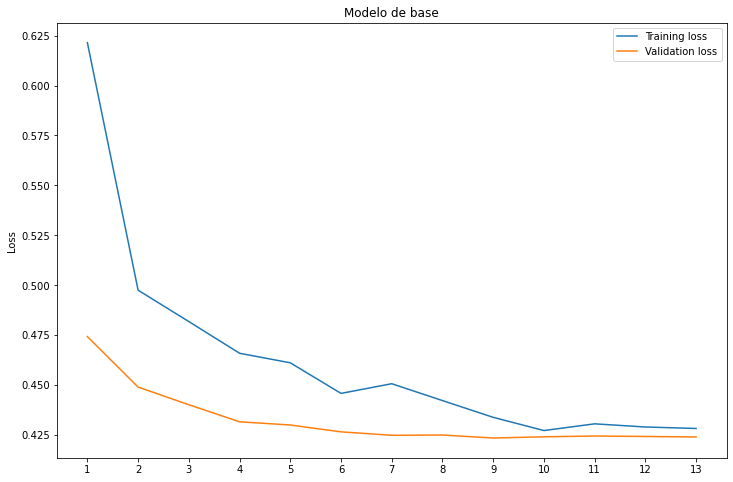

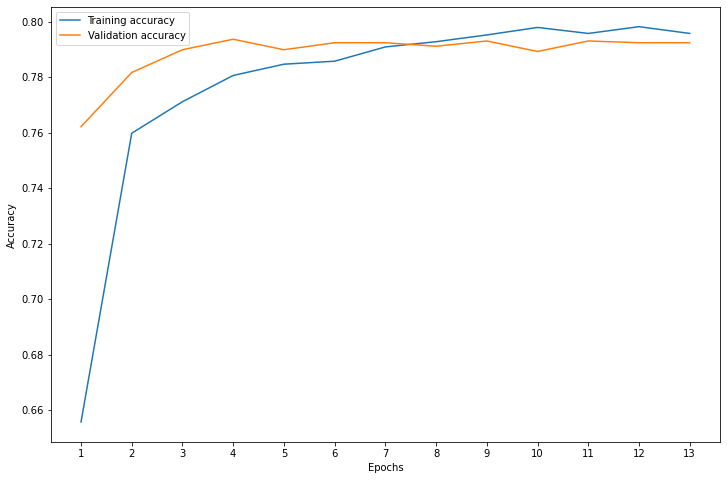

In [114]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);


In [115]:
yprednn=model.predict(X_test)
yprednn=yprednn.round()
print('Neural Network:\n {}\n'.format(
    classification_report(np.argmax(y_test, axis=1), np.argmax(yprednn, axis=1))))
print('Neural Network:\n {}\n'.format(
    confusion_matrix(np.argmax(y_test, axis=1), np.argmax(yprednn, axis=1))))


Neural Network:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1294
           1       0.63      0.56      0.59       467

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761


Neural Network:
 [[1143  151]
 [ 207  260]]



Confusion matrix, without normalization
[[1143  151]
 [ 207  260]]


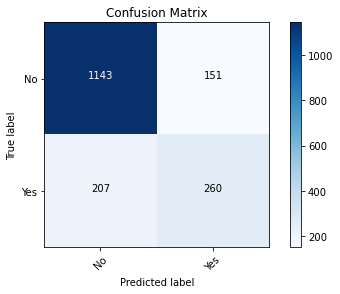

In [116]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(yprednn, axis=1))


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm=cm, classes=['No', 'Yes'], title='Confusion Matrix')